# Modelagem, Simulação e Implementação de Sistemas
### Lista V - Análise Transitória
Guilherme Brandão da Silva

In [1]:
% Carrega módulos para operações simbólicas e operações em frequência
pkg load control
pkg load symbolic
pkg load signal

In [2]:
% Function para Plotar a Inversa de Laplace (Simbólica)
function plot_ilap(f, l)
    p = ezplot(f);
    axis(l);
    set(p,'linewidth', 1, 'color', 'k');
end;

### Exemplo 1: Realize a análise do seguinte sistema:
![](e1.png)


Transfer function 'Festimado' from input 'u1' to output ...

             2       
 y1:  ---------------
      s^2 + 0.7 s + 2

Continuous-time model.
yfinal =  1.0018
ysettle =  0.51799
settling_ind =  45
ans =

  scalar structure containing the fields:

    RiseTime =  0.77692
    SettlingTime =  20
    SettlingMin =  0.80628
    SettlingMax =  1.4432
    Overshoot =  0.44059
    Undershoot =  0.19518
    Peak =  1.4432
    PeakTime =  2.4000


Transfer function 'F' from input 'u1' to output ...

             5 s + 5       
 y1:  ---------------------
      s^3 + 4 s^2 + 5 s + 7

Continuous-time model.
yfinal =  0.71462
ysettle =  0.017251
settling_ind =  92
ans =

  scalar structure containing the fields:

    RiseTime =  0.68287
    SettlingTime =  20
    SettlingMin =  0.51327
    SettlingMax =  1.2443
    Overshoot =  0.74125
    Undershoot =  0.28176
    Peak =  1.2443
    PeakTime =  1.6162



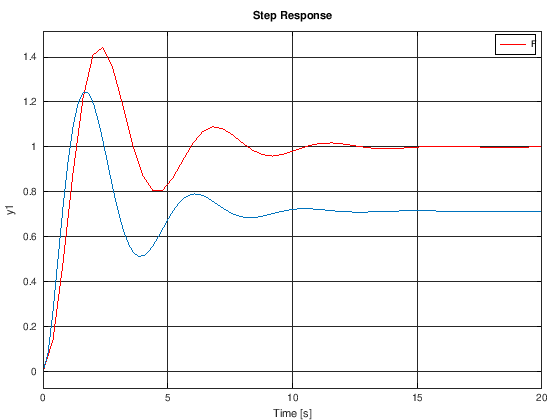

In [31]:
% Estimando os Parâmetros:
Festimado = tf(2, [1 0.7 2])

% Resposta ao Degrau
step(Festimado, 'r')
stepinfo(Festimado)

hold on;

% Montnado a Função de Transferência Exata
G1 = 5;
G2 = tf(1,[1 2]);
G3 = tf(1, [1 1]);
H1 = tf(1,[1 1]);

F = feedback(G1*G2*G3, H1)

% Resposta ao Degrau
step(F)
stepinfo(F)